# **Lab 6: Statistics**
---

### **Description**
This notebook shows how to implement and use the topics that we've been discussing in statistics.

<br>

### **Structure**
**Part 1**: [Descriptive Statistics with pandas](#p1)

**Part 2**: [Histograms, Box Plots, and Violin Plots with Matplotlib](#p2)

**Part 3**: [Chi-Squared and T-Tests for Feature Selection with Sklearn](#p3)

**Part 4**: [T-Tests for Model Selection with Sklearn](#p4)

**Part 5**: [Challenge Problem](#p5)

<br>

### **Learning Objectives**
1. Recognize how to calculate descriptive statistics such as mean, median, mode, variance, and standard deviation using pandas.
1. Recognize how to apply and interpret Z-scores and percentiles to understand the spread and distribution of data.
1. Recognize the process of performing hypothesis testing, including formulating null and alternative hypotheses, and calculating test statistics.
1. Recognize how to interpret p-values and make decisions based on statistical significance.

<br>

**Run the cell below to load all necessary functions and libraries.**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_breast_cancer, fetch_california_housing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from scipy.stats import ttest_ind, ttest_rel

<a name="p1"></a>

---
## **Part 1: Descriptive Statistics with pandas**
---

In this section, we will see a mix of old and new methods that can all be used for exploring the statistics of a dataframe.

#### **Problem #1.1**

We can use the `.describe()` method to get an overview of the descriptive statistics in a dataframe.

In [ ]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

print("1. Descriptive Statistics of a Dataset:")
print(df.describe())

1. Descriptive Statistics of a Dataset:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


#### **Problem #1.2**

We can use the `.corr()` to look at the correlations between each column in a dataframe.

In [ ]:
print("2. Correlation Matrix:")
print(df.corr())

2. Correlation Matrix:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


#### **Problem #1.3**

Oftentimes, we want to understand how different single variable statistics such as mean, median, standard deviation, etc. change within different groups. We can use the `.groupby(...)` and `.agg(...)` methods to do just this!

<br>

**NOTE**: Because mean and median require numerical variables, we select only numerical columns from our dataframe first in the code below.

In [ ]:
df = sns.load_dataset('titanic')
print("3. Summary Statistics by Group:")

numeric_cols = df.select_dtypes(include='number').columns
print(df.groupby('sex')[numeric_cols].agg(['mean', 'median']))

3. Summary Statistics by Group:
        survived           pclass               age            sibsp         \
            mean median      mean median       mean median      mean median   
sex                                                                           
female  0.742038    1.0  2.159236    2.0  27.915709   27.0  0.694268    0.0   
male    0.188908    0.0  2.389948    3.0  30.726645   29.0  0.429809    0.0   

           parch              fare         
            mean median       mean median  
sex                                        
female  0.649682    0.0  44.479818   23.0  
male    0.235702    0.0  25.523893   10.5  


#### **Problem #1.4**

We can use `.value_counts()` to find the counts for different categories of a different variable.

In [ ]:
print("4. Value Counts:")
print(df['embarked'].value_counts())

4. Value Counts:
embarked
S    644
C    168
Q     77
Name: count, dtype: int64


#### **Problem #1.5**

Oftentimes, datasets contain missing values. There are many ways to find and deal with these. Below, we have provided a way to look at the percentage of missing values in each column by taking the mean of 0s (not missing/na) and 1s (missing/na).

In [ ]:
print("5. Missing Values:")
print(df.isna().mean() * 100)

5. Missing Values:
survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64


#### **Problem #1.6**

A common set of measurements in descriptive statistics is quartiles and the associated Interquartile Range (IQR) as described below:

<br>

**Quartiles**: Quartiles divide a ranked data set into four equal parts. There are three quartiles:

* First Quartile (Q1): Also known as the 25th percentile. It is the median of the lower half of the data set (excluding the overall median if the number of observations is odd). 25% of the data falls below Q1.
* Second Quartile (Q2): Also known as the 50th percentile or the median. It divides the data set into two equal halves. 50% of the data falls below Q2.
* Third Quartile (Q3): Also known as the 75th percentile. It is the median of the upper half of the data set (excluding the overall median if the number of observations is odd). 75% of the data falls below Q3.

<br>


**Interquartile Range (IQR)**: The IQR is a measure of statistical dispersion and is calculated as the difference between the third quartile (Q3) and the first quartile (Q1): $ IQR = Q_3 -Q_1$.

The IQR measures the range within which the central 50% of the values lie. It is a robust measure of variability because it is not affected by outliers or extreme values.

<br>

**NOTE**: Quartiles are a specific form of the more general quantiles, which divide data up into any number of equal parts such as:
* Quintiles: Divide the data into 5 equal parts.
* Deciles: Divide the data into 10 equal parts.
* Percentiles: Divide the data into 100 equal parts.

In [ ]:
data = load_iris()

df = pd.DataFrame(data.data, columns=data.feature_names)
quantiles = df.quantile([0.25, 0.5, 0.75])
iqr = quantiles.loc[0.75] - quantiles.loc[0.25]

print("6. Quantiles and IQR:")
print(quantiles)
print('\nIQR:', iqr)

6. Quantiles and IQR:
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0.25                5.1               2.8               1.60               0.3
0.50                5.8               3.0               4.35               1.3
0.75                6.4               3.3               5.10               1.8

IQR: sepal length (cm)    1.3
sepal width (cm)     0.5
petal length (cm)    3.5
petal width (cm)     1.5
dtype: float64


#### **Problem #1.7**

Here we standardize our data and see how the quartiles change as just one example of what standardized vs. unstandardized data may look like.

In [ ]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print("7. Standardizing Data:")
print(df_scaled.head())
print("\n")

quantiles = df_scaled.quantile([0.25, 0.5, 0.75])
iqr = quantiles.loc[0.75] - quantiles.loc[0.25]

print("Quantiles and IQR:")
print(quantiles)
print('\nIQR:', iqr)

7. Standardizing Data:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


Quantiles and IQR:
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0.25          -0.900681         -0.592373          -1.226552         -1.183812
0.50          -0.052506         -0.131979           0.336478          0.132510
0.75           0.674501          0.558611           0.762758          0.790671

IQR: sepal length (cm)    1.575182
sepal width (cm)     1.150984
petal length (cm)    1.989310
petal width (cm)     1.974483
dtype: float64


#### **Problem #1.8**

For any dataset, we can look at the largest entries using `.nlargest(...)`. Notice that the ordering is the same for the standardized vs. unstandardized data even though the values themselves are different.

In [ ]:
top_10 = df.nlargest(10, 'sepal length (cm)')
top_10_scaled = df_scaled.nlargest(10, 'sepal length (cm)')

print("8. Top N Rows by Value:")
print(top_10)
print('\n',top_10_scaled)

8. Top N Rows by Value:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
131                7.9               3.8                6.4               2.0
117                7.7               3.8                6.7               2.2
118                7.7               2.6                6.9               2.3
122                7.7               2.8                6.7               2.0
135                7.7               3.0                6.1               2.3
105                7.6               3.0                6.6               2.1
130                7.4               2.8                6.1               1.9
107                7.3               2.9                6.3               1.8
109                7.2               3.6                6.1               2.5
125                7.2               3.2                6.0               1.8

      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
131           2.492019          1.7095

#### **Problem #1.9**

Lastly, one way that we can detect outliers in our data using quartiles and the IQR. Can you see how many outliers there are according to this approach?

In [ ]:
df = sns.load_dataset('titanic')
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['fare'] < Q1 - 1.5 * IQR) | (df['fare'] > Q3 + 1.5 * IQR)]
print("10. Detecting Outliers:")
print(outliers)
print("\n")

10. Detecting Outliers:
     survived  pclass     sex   age  sibsp  parch      fare embarked  class  \
1           1       1  female  38.0      1      0   71.2833        C  First   
27          0       1    male  19.0      3      2  263.0000        S  First   
31          1       1  female   NaN      1      0  146.5208        C  First   
34          0       1    male  28.0      1      0   82.1708        C  First   
52          1       1  female  49.0      1      0   76.7292        C  First   
..        ...     ...     ...   ...    ...    ...       ...      ...    ...   
846         0       3    male   NaN      8      2   69.5500        S  Third   
849         1       1  female   NaN      1      0   89.1042        C  First   
856         1       1  female  45.0      1      1  164.8667        S  First   
863         0       3  female   NaN      8      2   69.5500        S  Third   
879         1       1  female  56.0      0      1   83.1583        C  First   

       who  adult_male deck

<a name="p2"></a>

---
## **Part 2: Histograms, Box Plots, and Violin Plots with Matplotlib**
---

The visualizing techniques we've already learned can go a long way in understanding the descriptive statistics of our data. However, there are a few more types of visualizations that are worth adding to your toolbelt:
* Histograms
* Box Plots
* Violin Plots

#### **Problem #2.1**

A histogram displays the distribution of a single numerical variable by dividing the data into bins and counting the number of observations in each bin. Use histograms to understand the frequency distribution, spread, and skewness of the data.

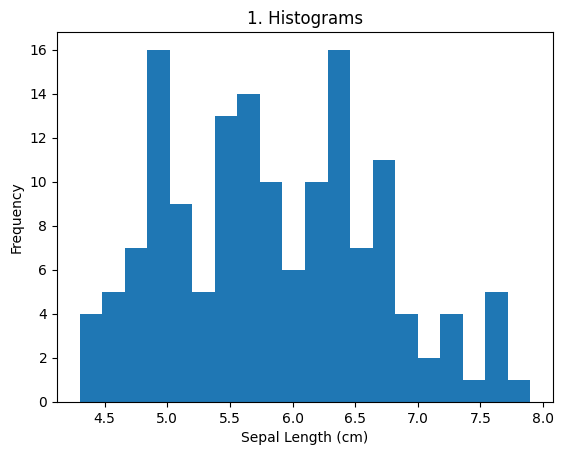

In [ ]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

plt.hist(df['sepal length (cm)'], bins=20)

plt.title("1. Histograms")
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')

plt.show()

#### **Problem #2.2**

A histogram by group shows the distribution of a numerical variable for different categories within a dataset, using multiple histograms overlaid or side-by-side. Use this plot to compare the distribution of a variable across different groups or categories.

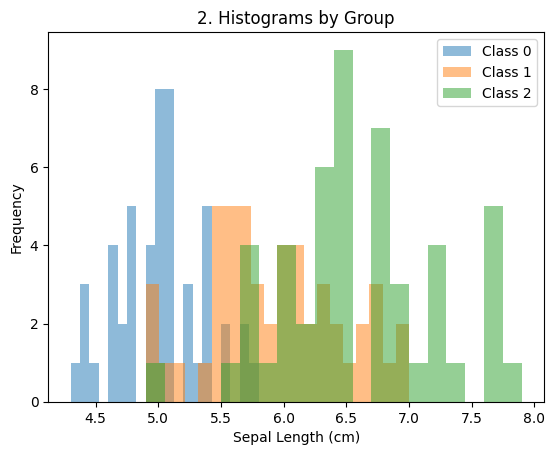

In [ ]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

plt.hist(df[df['target'] == 0]['sepal length (cm)'], bins=20, alpha=0.5, label='Class 0')
plt.hist(df[df['target'] == 1]['sepal length (cm)'], bins=20, alpha=0.5, label='Class 1')
plt.hist(df[df['target'] == 2]['sepal length (cm)'], bins=20, alpha=0.5, label='Class 2')

plt.legend()
plt.title("2. Histograms by Group")
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')

plt.show()

#### **Problem #2.3**

An overlayed histogram displays multiple histograms for different groups on the same axes, with transparency to compare their distributions. This is useful for directly comparing the distributions of a variable across different groups while maintaining a clear view of overlaps.

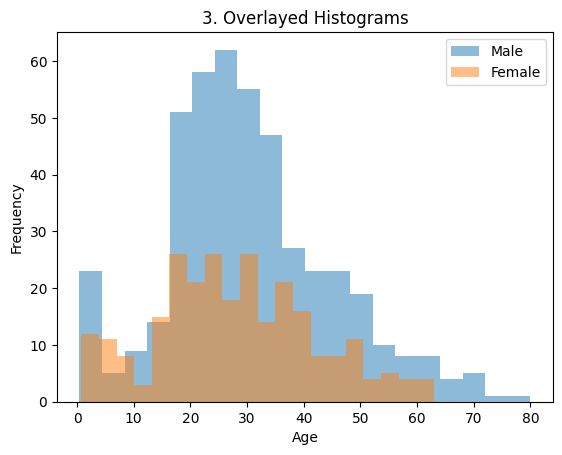

In [ ]:
df = sns.load_dataset('titanic')

plt.hist(df[df['sex'] == 'male']['age'].dropna(), bins=20, alpha=0.5, label='Male')
plt.hist(df[df['sex'] == 'female']['age'].dropna(), bins=20, alpha=0.5, label='Female')

plt.legend()
plt.title("3. Overlayed Histograms")
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

#### **Problem #2.4**

A box plot (or box-and-whisker plot) summarizes the distribution of a numerical variable through its quartiles, highlighting the median, interquartile range (IQR), and potential outliers. Use box plots to compare distributions and identify outliers across one or more datasets.

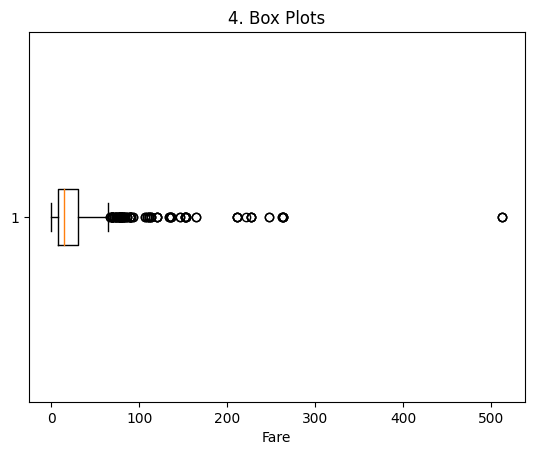

In [ ]:
df = sns.load_dataset('titanic')

plt.boxplot(df['fare'].dropna(), vert=False)
plt.title("4. Box Plots")
plt.xlabel('Fare')

plt.show()

#### **Problem #2.5**

A box plot by group shows multiple box plots for different categories within a dataset, allowing comparison of the distributions of a numerical variable across these categories. This is useful for comparing central tendency and variability among different groups.

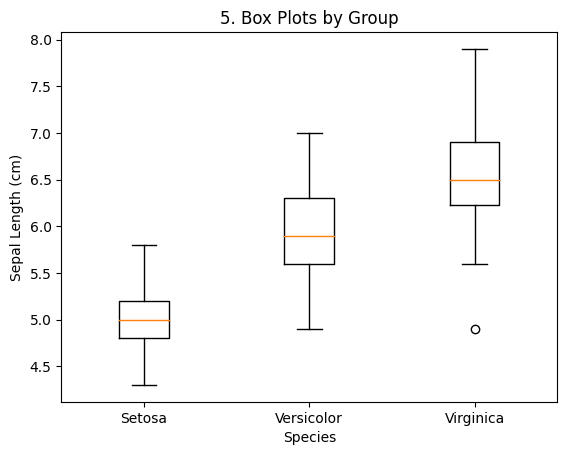

In [ ]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['species'] = data.target
species = [df[df['species'] == i]['sepal length (cm)'] for i in range(3)]

plt.boxplot(species, labels=['Setosa', 'Versicolor', 'Virginica'])

plt.title("5. Box Plots by Group")
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')

plt.show()

#### **Problem #2.6**

Multiple box plots display box plots for several variables side-by-side, enabling comparison of their distributions. Use this plot to compare the spread, central tendency, and outliers of multiple variables within the same dataset.

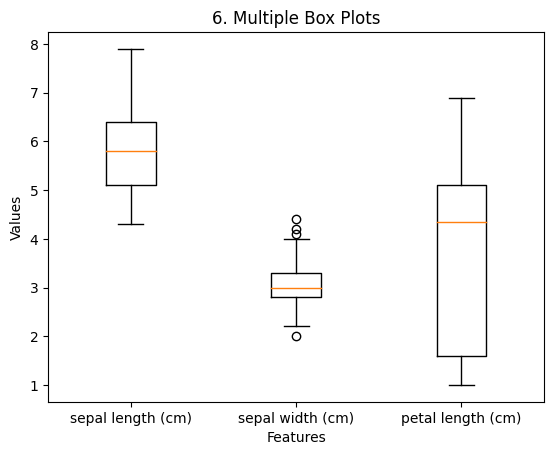

In [ ]:
data = load_iris()

plt.boxplot([df[col] for col in df.columns[:3]], labels=df.columns[:3])

plt.title("6. Multiple Box Plots")
plt.xlabel('Features')
plt.ylabel('Values')

plt.show()

#### **Problem #2.7**

A violin plot combines aspects of a box plot and a probability density (KDE) plot, displaying the distribution of a numerical variable through its probability density along with the median and quartiles. Use violin plots for a detailed view of the data distribution's shape and variability.

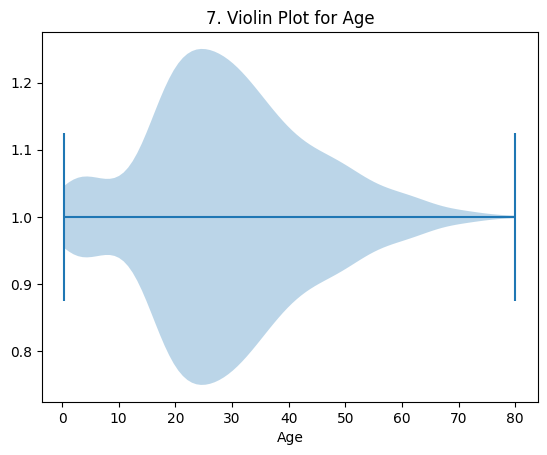

In [ ]:
df = sns.load_dataset('titanic')
data = df['age'].dropna()

plt.violinplot(data, vert=False)
plt.title("7. Violin Plot for Age")
plt.xlabel('Age')
plt.show()

#### **Problem #2.8**

A violin plot by group shows violin plots for different categories within a dataset, allowing comparison of the distributions of a numerical variable across these categories. This is useful for comparing the full distribution, including density, central tendency, and variability, among different groups.

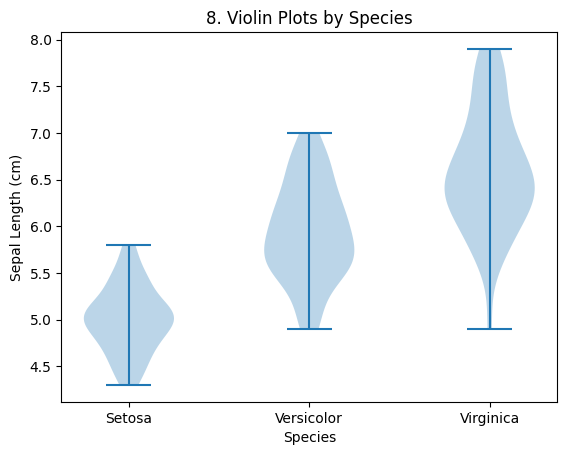

In [ ]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['species'] = data.target

species_data = [df[df['species'] == i]['sepal length (cm)'] for i in range(3)]

plt.violinplot(species_data)

plt.title("8. Violin Plots by Species")
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.xticks([1, 2, 3], ['Setosa', 'Versicolor', 'Virginica'])

plt.show()

<a name="p3"></a>

---
## **Part 3: Chi-Squared and T-Tests for Feature Selection with Sklearn**
---

This section focuses on feature selection techniques using Chi-Squared and T-tests with sklearn, which are crucial for improving model performance by selecting the most relevant features.

* The Chi-Squared test evaluates the independence of categorical features and the target variable, making it suitable for classification problems.

* The ANOVA F-test (a type of T-test) compares the means of different groups to identify significant numerical features. These methods help in refining datasets by retaining only the most informative features.

#### **Problem #3.1**

Here we apply the Chi-Squared test to determine if there is a significant association between two categorical variables, such as the 'Embarked' and 'Survived' columns in the Titanic dataset. This helps in understanding relationships between categorical features and the target variable. A key part of this is that we can get the p-value from the chi-squared test directly from the sklearn `chi2(...)` method, which we can then use to help make a decision about whether we think there is an effect or not.

In [ ]:
df = sns.load_dataset('titanic')
df = df.dropna(subset=['embarked', 'survived'])

le = LabelEncoder()
df['embarked_encoded'] = le.fit_transform(df['embarked'])
df['survived_encoded'] = le.fit_transform(df['survived'])

chi2_stat, p_val = chi2(df[['embarked_encoded']], df['survived_encoded'])

print("1. Chi-Squared Test with Categorical Data:")
print(f"Chi2 Stat: {chi2_stat[0]}, P-Value: {p_val[0]}")

2. Chi-Squared Test with Categorical Data:
Chi2 Stat: 10.45160096377068, P-Value: 0.0012254319914047369


#### **Problem #3.2**

One way to select which categorical features to use in a classification problem is to use the Chi-Squared test to evaluate the independence between each feature and the target variable, selecting the top features based on their Chi-Squared scores.

In [ ]:
df = sns.load_dataset('titanic')
df = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'survived']].dropna()

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=['pclass', 'sex', 'embarked'], drop_first=True)

# Separate features and target
X = df_encoded.drop('survived', axis=1)
y = df_encoded['survived']

# Apply Chi-Squared feature selection
selector = SelectKBest(chi2, k=5)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support(indices=True)]
discarded_features = X.columns[~selector.get_support(indices=True)]

print("2. Chi-Squared Test for Feature Selection:")
print('Selected Features:', selected_features)
print('Discarded Features:', discarded_features)

2. Chi-Squared Test for Feature Selection:
Selected Features: Index(['age', 'parch', 'fare', 'pclass_3', 'sex_male'], dtype='object')
Discarded Features: Index(['embarked_S', 'sex_male', 'pclass_3', 'fare', 'parch'], dtype='object')


#### **Problem #3.3**

Perform a T-Test (ANOVA F-test specifically) to select the most significant features by comparing the means of different groups. This test is helpful for selecting numerical features that contribute significantly to the target variable.

In [ ]:
data = load_breast_cancer()
X, y = data.data, data.target

selector = SelectKBest(f_classif, k=5)
X_new = selector.fit_transform(X, y)
selected_features = [data.feature_names[i] for i in selector.get_support(indices=True)]
discarded_features = [data.feature_names[i] for i in range(X.shape[1]) if i not in selector.get_support(indices=True)]

print("3. T-Test for Feature Selection:")
print('Selected Features:', selected_features)
print('Discarded Features:', discarded_features)

3. T-Test for Feature Selection:
Selected Features: ['mean perimeter', 'mean concave points', 'worst radius', 'worst perimeter', 'worst concave points']
Discarded Features: ['mean radius', 'mean texture', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst texture', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst symmetry', 'worst fractal dimension']


#### **Problem #3.4**

Conduct a paired T-test to compare the means of two related variables, such as `sepal length` and `sepal width` for each species in the Iris dataset. This helps in understanding the relationship and differences between paired measurements.

In [ ]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
species = data.target_names[data.target]
print("4. Paired T-Test:")
for sp in set(species):
    df_sp = df[species == sp]
    t_stat, p_val = ttest_rel(df_sp['sepal length (cm)'], df_sp['sepal width (cm)'])
    print(f"Species: {sp}, T-Stat: {t_stat}, P-Value: {p_val}")

4. Paired T-Test:
Species: setosa, T-Stat: 42.32339235217487, P-Value: 3.0231710793686155e-40
Species: virginica, T-Stat: 45.11720183309328, P-Value: 1.4240601345854564e-41
Species: versicolor, T-Stat: 50.75716766574763, P-Value: 4.99477639160663e-44


<a name="p4"></a>

---
## **Part 4: T-Tests for Model Selection with Sklearn**
---

In this section, we use T-tests to compare the performance of different machine learning models, ensuring that the observed differences are statistically significant. By applying T-tests to cross-validated scores of various models, we can objectively determine which model performs better. This includes comparing classifiers like Logistic Regression and SVM, or regression models like Linear Regression and Ridge. These statistical tests provide a rigorous approach to model evaluation and selection, enhancing the reliability of our conclusions.

<br>

In practice, it's important to decide on the t-test results and p-values that will lead to different decisions *before* running any tests to avoid any possible bias and to maintain scientific integrity. In general,

* T-Statistic (T-Stat): This value indicates the size of the difference relative to the variation in your sample data. A larger absolute T-statistic suggests a greater difference between the two sets of scores.

* P-Value: This value indicates the probability of observing the data, or something more extreme, assuming that the null hypothesis is true. The null hypothesis typically states that there is no difference between the models' performances.


The convention is to set a significance level (a value below which we reject the null hypothesis) of 0.05. If we want to be *very* sure, we may choose closer to 0.01.

<br>

These values can be confusing to interpret, even for experts! Some important misconceptions and misinterpretations to be aware of:

* Assuming Significance Based on T-Stat Alone: A high T-Stat alone doesn't guarantee significance; you must consider the P-value.
* Misinterpreting High P-Values: High P-values do not confirm that the models are equivalent; they indicate insufficient evidence to declare a significant difference.
* Ignoring Practical Significance: Even if there is no statistically significant difference, practical significance (e.g., model interpretability, training time, etc.) might still favor one model over another.
* Overlooking Assumptions of the T-Test: Ensure the assumptions of the T-test are met, including the distribution of differences and independence of samples.
* One-Time Evaluation: Cross-validation and multiple runs should be used to ensure the robustness of the results.

#### **Problem #4.1**

Here, we train two different classifiers (Logistic Regression and SVM) on the same dataset and use a T-test to compare their cross-validated accuracies. This helps determine if there is a statistically significant difference in their performance.

In [ ]:
data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model1 = LogisticRegression(max_iter=200)
model2 = SVC()

scores1 = cross_val_score(model1, X_train, y_train, cv=5)
scores2 = cross_val_score(model2, X_train, y_train, cv=5)

t_stat, p_val = ttest_ind(scores1, scores2)
print("1. T-Test for Comparing Models:")
print(f"T-Stat: {t_stat}, P-Value: {p_val}\n")

# Interpretation
if p_val > 0.05:
    print("There is no statistically significant difference between the model performances.")
else:
    print("There is a statistically significant difference between the model performances.")

1. T-Test for Comparing Models:
T-Stat: 0.3429971702850164, P-Value: 0.7404394537249632

There is no statistically significant difference between the model performances.


#### **Problem #4.2**

Here, we perform cross-validation on two models (e.g., Decision Tree and Random Forest) using the same dataset and compare their mean cross-validated scores using a T-test. This helps in evaluating which model performs better statistically.

In [ ]:
data = load_iris()
X, y = data.data, data.target

model1 = DecisionTreeClassifier()
model2 = RandomForestClassifier()

scores1 = cross_val_score(model1, X, y, cv=5)
scores2 = cross_val_score(model2, X, y, cv=5)

t_stat, p_val = ttest_ind(scores1, scores2)
print("2. T-Test for Cross-Validated Scores:")
print(f"T-Stat: {t_stat}, P-Value: {p_val}\n")

# Interpretation
if p_val > 0.05:
    print("There is no statistically significant difference between the model performances.")
else:
    print("There is a statistically significant difference between the model performances.")

2. T-Test for Cross-Validated Scores:
T-Stat: -0.3162277660168347, P-Value: 0.7599229683487414

There is no statistically significant difference between the model performances.


#### **Problem #4.3**

Here, train and evaluate two regression models (e.g., Linear Regression and Ridge Regression) on the Diabetes dataset, and use a paired T-test to compare their performance. This helps determine if the performance difference is statistically significant.

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from scipy.stats import ttest_rel

# Load the diabetes dataset
data = load_diabetes()
X, y = data.data, data.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Linear Regression and Ridge Regression models
model1 = LinearRegression()
model2 = Ridge()

# Perform cross-validation and calculate the negative mean squared error
scores1 = cross_val_score(model1, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
scores2 = cross_val_score(model2, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Perform a paired T-test
t_stat, p_val = ttest_rel(scores1, scores2)

# Output results
print("3. Paired T-Test for Model Performance using the Diabetes Dataset:")
print(f"T-Stat: {t_stat}, P-Value: {p_val}\n")

# Interpretation
if p_val > 0.05:
    print("There is no statistically significant difference between the model performances.")
else:
    print("There is a statistically significant difference between the model performances.")

3. Paired T-Test for Model Performance using the Diabetes Dataset:
T-Stat: 2.8531658898635115, P-Value: 0.0462475779862285

There is a statistically significant difference between the model performances.


<a name="p5"></a>

---
## **Part 5: Challenge Problem**
---

In this section, it's up to you to apply what you've learned from above to accomplish the following open ended challenge: Conduct an exploratory data analysis (EDA) and perform hypothesis testing on one of the datasets below. Your task is to uncover interesting insights and make a precise claim based on statistical tests.

<br>

**Requirements**
1. **Data Exploration**: Use at least one of the following: quartiles, IQR, histograms, box plots, or violin plots to explore the dataset and present your findings.

2. **Hypothesis Testing**: Determine specific null and alternative hypotheses and a significance level. To test these hypotheses, perform at least one of the following tests: T-test or Chi-squared test. Make a precise claim based on the results of your statistical test, supported by the p-value and the significance level.

3. **Report**: Provide a clear and concise report detailing your EDA, the hypothesis you tested, the results, and the interpretation of the P-value. Include at least one visualization to support your findings.

<br>

**Data Sets**

You must use *one* of these datasets:

* **Titanic Dataset**:
> * **Description**: Analyze the survival rates on the Titanic based on various features such as age, sex, class, and fare.
> * **Potential Tasks**: Explore survival rates using visualizations, and perform a Chi-squared test to see if survival is independent of class or sex.

* **Diabetes Dataset**:
> * **Description**: Analyze the health indicators of diabetes patients.
> * **Potential Tasks**: Explore the distribution of health indicators such as blood pressure, BMI, and glucose levels using visualizations. Perform a T-test to compare the means of two continuous features or groups.

#### **Load the Titanic Dataset**

In [ ]:
url = "https://raw.githubusercontent.com/the-codingschool/TRAIN-datasets/main/titanic/titanic_cleaned.csv"
df = pd.read_csv(url)

df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Sibsp', 'Parch', 'Fare','Embarked', 'HasCabin']]

df.head()

,Survived,Pclass,Sex,Age,Sibsp,Parch,Fare,Embarked,HasCabin
0,0,3,male,22,1,0,7.2500,S,False
1,1,1,female,38,1,0,71.2833,C,True
2,1,3,female,26,0,0,7.9250,S,False
3,1,1,female,35,1,0,53.1000,S,True
4,0,3,male,35,0,0,8.0500,S,False


#### **Load the Diabetes Dataset**

In [ ]:
url = "https://raw.githubusercontent.com/the-codingschool/TRAIN/main/diabetes/diabetes_prediction.xlsx"
df = pd.read_excel(url)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#End of notebook
---
© 2025 The Coding School, All rights reserved